# Apoio

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.linalg import norm

In [9]:
df = pd.read_pickle('../data/final/enem_data_embeddings_50.pkl')
df.head()

,numero_questao,gabarito,NU_PARAM_A,nu_param_B,NU_PARAM_C,ANO,enunciado,alternativas,gabarito_texto,distratores,enunciado_limpo,alternativas_limpo,gabarito_texto_limpo,distratores_limpo,enunciado_embeddings_word2vec,gabarito_embeddings_word2vec
0,1,C,3.43894,0.97831,0.10855,2017,"No império africano do Mali, no século XIV, To...",A: isolamento geográﬁco do Saara ocidental; B...,posição relativa nas redes de circulação,isolamento geográﬁco do Saara ocidental; explo...,africano além astronomia centro cidade comérci...,A: isolamento ocidental saara; B: exploração i...,circulação posição redes relativa,competição econômica exploração intensiva isol...,"[0.09772969, 0.013166125, -0.032748703, 0.0580...","[-0.04434625, 0.2105245, -0.18144351, 0.030336..."
1,2,D,3.00837,0.49169,0.13877,2017,Após a Declaração Universal dos Direitos Human...,A: ataque feito pelos japoneses à base milita...,execução de judeus e eslavos presos em guetos ...,ataque feito pelos japoneses à base militar am...,aberrações acontecimentos após assumida branco...,A: americana ataque base feito harbor japonese...,campos concentração eslavos execução guetos ju...,americana americanas ataque atômicas base bomb...,"[-0.018823402, 0.07832528, -0.016192827, 0.027...","[0.21008351, 0.5248949, 0.03625112, 0.01772637..."
2,3,D,0.60432,3.25992,0.08798,2017,"A moralidade, Bentham exortava, não é uma ques...",A: fundamentação cientíﬁca de viés positivist...,racionalidade de caráter pragmático,fundamentação cientíﬁca de viés positivista; c...,abstratas afetados agradar ação bentham condut...,A: fundamentação positivista viés; B: convençã...,caráter pragmático racionalidade,comportamental convenção fundamentação inclina...,"[-0.013062097, 0.038470805, -0.020605344, 0.05...","[0.16413634, -0.035050992, 0.08454134, 0.23227..."
3,4,E,1.85031,0.57925,0.11344,2017,Fala-se muito nos dias de hoje em direitos do ...,A: modernização da educação escolar; B: atuali...,universalização do princípio da igualdade civil,modernização da educação escolar; atualização ...,apresenta assembleia bases bem cidadão concepç...,A: educação escolar modernização; B: atualizaç...,civil igualdade princípio universalização,aristocráticos atualização conhecimento costum...,"[-0.042833664, -0.01434522, -0.002431296, 0.01...","[0.102909006, 0.06116425, -0.13846825, 0.33034..."
4,5,C,2.46290,0.76307,0.17672,2017,Na Constituição da República Federativa do Bra...,A: etnia e miscigenação racial; B: sociedade...,espaço e sobrevivência cultural,etnia e miscigenação racial; sociedade e igual...,aplicação artigo bens brasil competindo consta...,A: etnia miscigenação racial; B: igualdade jur...,cultural espaço sobrevivência,ambiental bem econômica educação etnia igualda...,"[0.010493249, 0.11095436, 0.017243173, 0.05319...","[0.267512, -0.081234336, 0.08019033, 0.1294613..."


In [32]:
# Removendo observações em que o param B é nulo
df = df[df['nu_param_B'].notna()]

In [30]:
df_exploded = pd.read_csv('../data/final/enem_data_embeddings_50_exploded.csv')
df_exploded.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,y
0,0.097730,0.013166,-0.032749,0.058064,0.066659,0.055518,0.005533,-0.010803,0.124288,-0.010112,...,0.149049,-0.103425,0.085180,0.109060,0.018974,0.037986,0.010234,-0.070827,-0.104570,1.384018
1,-0.018823,0.078325,-0.016193,0.027615,0.080563,-0.001443,-0.011481,-0.011694,0.046921,-0.053186,...,0.106786,0.061356,0.139279,0.123225,-0.019229,0.167333,0.101951,-0.028866,-0.109328,1.034893
2,-0.013062,0.038471,-0.020605,0.051806,0.062729,-0.029429,0.076300,0.081863,0.074962,0.029681,...,0.264843,0.080967,0.118467,0.042564,-0.042368,0.108510,0.100451,-0.141360,-0.054252,2.781651
3,-0.042834,-0.014345,-0.002431,0.015723,0.100305,0.023464,0.047759,0.088246,0.083725,-0.059424,...,0.104256,0.096123,0.056716,0.125574,-0.014302,0.038790,0.018908,-0.013034,-0.059200,1.099655
4,0.010493,0.110954,0.017243,0.053193,0.005365,-0.082108,0.063029,-0.078666,-0.008422,0.028746,...,0.141793,0.088591,0.131339,0.022100,0.004114,0.075874,0.088452,-0.058793,-0.005872,1.232730


In [23]:
# Função para calcular a similaridade do cosseno
def cosine_similarity(A, B):
    return np.dot(A,B)/(norm(A)*norm(B))

# Calculando a similaridade

In [33]:
similarities = []
for index, row in df.iterrows():
    # print(row)
    similarities.append(cosine_similarity(row['enunciado_embeddings_word2vec'], row['gabarito_embeddings_word2vec']))

similarities

[0.25150418,
 0.6347847,
 0.6554024,
 0.48512548,
 0.55958396,
 0.6558605,
 0.4598626,
 0.52978,
 0.6777821,
 0.5849961,
 0.6439675,
 0.739674,
 0.4790911,
 0.5967941,
 0.6255312,
 0.4237413,
 0.64696014,
 0.347149,
 0.668695,
 0.61384374,
 0.57249683,
 0.5181705,
 0.49352303,
 0.6184693,
 0.6639728,
 0.23437622,
 0.51294076,
 0.5416961,
 0.49967188,
 0.62631774,
 0.4552325,
 0.7044263,
 0.5890417,
 0.68880403,
 0.5123075,
 0.4108454,
 0.4594457,
 0.69783616,
 0.5513111,
 0.7903223,
 0.53204423,
 0.6145055,
 0.6874815,
 0.55853796,
 0.5613519,
 0.3989897,
 0.5283956,
 0.5196936,
 0.7488746,
 0.33241528,
 0.6141485,
 0.6378165,
 0.41405857,
 0.56163484,
 0.5877631,
 0.6275749,
 0.2984056,
 0.46800277,
 0.37014207,
 0.5505843,
 0.73041904,
 0.6006035,
 0.51972884,
 0.5729913,
 0.6603715,
 0.8168332,
 0.6769199,
 0.44104168,
 0.44493696,
 0.5840181,
 0.75070214,
 0.5754942,
 0.49913567,
 0.61799616,
 0.5973036,
 0.7547651,
 0.5864638,
 0.5155646,
 0.34775978,
 0.7577136,
 0.49967036,
 0.7

## Ajustando dataset

In [36]:
df_exploded['similaridade_enunciado_gabarito'] = similarities
df_exploded.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X43,X44,X45,X46,X47,X48,X49,X50,y,similaridade_enunciado_gabarito
0,0.097730,0.013166,-0.032749,0.058064,0.066659,0.055518,0.005533,-0.010803,0.124288,-0.010112,...,-0.103425,0.085180,0.109060,0.018974,0.037986,0.010234,-0.070827,-0.104570,1.384018,0.251504
1,-0.018823,0.078325,-0.016193,0.027615,0.080563,-0.001443,-0.011481,-0.011694,0.046921,-0.053186,...,0.061356,0.139279,0.123225,-0.019229,0.167333,0.101951,-0.028866,-0.109328,1.034893,0.634785
2,-0.013062,0.038471,-0.020605,0.051806,0.062729,-0.029429,0.076300,0.081863,0.074962,0.029681,...,0.080967,0.118467,0.042564,-0.042368,0.108510,0.100451,-0.141360,-0.054252,2.781651,0.655402
3,-0.042834,-0.014345,-0.002431,0.015723,0.100305,0.023464,0.047759,0.088246,0.083725,-0.059424,...,0.096123,0.056716,0.125574,-0.014302,0.038790,0.018908,-0.013034,-0.059200,1.099655,0.485125
4,0.010493,0.110954,0.017243,0.053193,0.005365,-0.082108,0.063029,-0.078666,-0.008422,0.028746,...,0.088591,0.131339,0.022100,0.004114,0.075874,0.088452,-0.058793,-0.005872,1.232730,0.559584


## Correlação entre nova feature e target

In [37]:
df_exploded[['y', 'similaridade_enunciado_gabarito']].corr()

,y,similaridade_enunciado_gabarito
y,1.000000,0.161507
similaridade_enunciado_gabarito,0.161507,1.000000


In [ ]:
# Salvando o dataset
df_exploded.to_csv('../data/final/enem_data_embeddings_50_exploded_similarity.csv', index=False)

# Estimando nova Árvore de Regressão com a Similaridade

In [1]:
# Célula necessária para rodar R no notebook -> dependência necessária: rpy2
%load_ext rpy2.ipython

/home/alesouza/.cache/pypoetry/virtualenvs/projeto-enem-YISx0mk8-py3.11/lib/python3.11/site-packages/rpy2/rinterface/__init__.py:1185: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/mnt/c/Users/aleso/AppData/Local/Programs/Microsoft VS Code", R: "/home/alesouza/USP/9_semestre/pcd-iii/projeto_enem/enem-embbedings-social-questions/notebooks"
  warnings.warn(
/home/alesouza/.cache/pypoetry/virtualenvs/projeto-enem-YISx0mk8-py3.11/lib/python3.11/site-packages/rpy2/rinterface/__init__.py:1185: UserWarning: Environment variable "LD_LIBRARY_PATH" redefined by R and overriding existing variable. Current: "/usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server", R: "/usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server:/usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server"
  warnings.warn(
/home/alesouza/.cache/pypoetry/virtualenvs/projeto-enem-YISx0mk8-py3.11/lib/python3.

In [43]:
%%R 

# Importando biblitoecas necessárias
library(tree)

# Inicializando uma seed
set.seed(42)

In [42]:
%%R

# Lendo o conjunto de dados
df = read.csv('enem_data_embeddings_50_exploded_similarity.csv')
colnames(df)

 [1] "X1"                              "X2"                             
 [3] "X3"                              "X4"                             
 [5] "X5"                              "X6"                             
 [7] "X7"                              "X8"                             
 [9] "X9"                              "X10"                            
[11] "X11"                             "X12"                            
[13] "X13"                             "X14"                            
[15] "X15"                             "X16"                            
[17] "X17"                             "X18"                            
[19] "X19"                             "X20"                            
[21] "X21"                             "X22"                            
[23] "X23"                             "X24"                            
[25] "X25"                             "X26"                            
[27] "X27"                             "X28"       

In [44]:
%%R

# Porcentagem do conjunto de teste
alpha = 0.7
inTrain = sample(1:nrow(df), alpha * nrow(df))

# Dividindo os conjuntos
train.set = df[inTrain,]
test.set = df[-inTrain,]

In [45]:
%%R

# Treinando o modelo com o conjunto de treino
df.model = tree(y ~ ., data = train.set)
df.model

node), split, n, deviance, yval
      * denotes terminal node

   1) root 186 46.23000 1.4400  
     2) X49 < -0.158059 21  3.05100 1.0120  
       4) X41 < 0.0499021 10  0.55110 1.2580 *
       5) X41 > 0.0499021 11  1.35000 0.7891  
        10) X9 < 0.0652442 5  0.40400 0.4973 *
        11) X9 > 0.0652442 6  0.16540 1.0320 *
     3) X49 > -0.158059 165 38.85000 1.4940  
       6) X17 < -0.0228147 96 24.88000 1.6130  
        12) X42 < 0.23317 86 19.85000 1.5550  
          24) similaridade_enunciado_gabarito < 0.679 72 15.09000 1.4800  
            48) X16 < 0.129629 57 11.08000 1.3940  
              96) X43 < -0.0193413 10  0.80990 1.8320 *
              97) X43 > -0.0193413 47  7.95100 1.3010  
               194) X6 < -0.01049 13  0.81220 1.6040  
                 388) X43 < 0.040318 8  0.18130 1.4330 *
                 389) X43 > 0.040318 5  0.02576 1.8770 *
               195) X6 > -0.01049 34  5.49600 1.1860  
                 390) X28 < 0.0408379 29  3.05900 1.2790  
        

In [46]:
%%R 

summary(df.model)


Regression tree:
tree(formula = y ~ ., data = train.set)
Variables actually used in tree construction:
 [1] "X49"                             "X41"                            
 [3] "X9"                              "X17"                            
 [5] "X42"                             "similaridade_enunciado_gabarito"
 [7] "X16"                             "X43"                            
 [9] "X6"                              "X28"                            
[11] "X32"                             "X45"                            
[13] "X38"                             "X24"                            
[15] "X21"                             "X39"                            
[17] "X14"                             "X10"                            
[19] "X46"                            
Number of terminal nodes:  25 
Residual mean deviance:  0.06665 = 10.73 / 161 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.62580 -0.17810 -0.01816  0.00000  0.

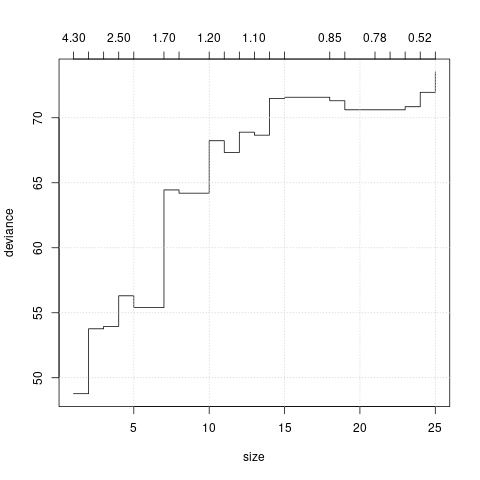

In [47]:
%%R 

# Utilizando validação cruzada para encontrar a melhor árvore
cv.model = cv.tree(df.model)
plot(cv.model); grid()

In [48]:
%%R
best.size = cv.model$size[which(cv.model$dev == min(cv.model$dev))]
best.size

[1] 1


**Apesar de a validação cruzada ter resultado numa árvore ideal de apenas uma folha, uma poda muito severa pode comprometer o resultado final.**

In [58]:
%%R 
cv.model.pruned = prune.tree(df.model, best=5)
summary(cv.model.pruned)


Regression tree:
snip.tree(tree = df.model, nodes = c(13L, 2L, 25L, 7L, 24L))
Variables actually used in tree construction:
[1] "X49"                             "X17"                            
[3] "X42"                             "similaridade_enunciado_gabarito"
Number of terminal nodes:  5 
Residual mean deviance:  0.1846 = 33.41 / 181 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.37600 -0.29620  0.02859  0.00000  0.27920  0.98230 


In [59]:
%%R
library(Metrics)

# Previsões no conjunto de treinamento
pred_train <- predict(cv.model.pruned, newdata = train.set)

# Previsões no conjunto de teste
pred_test <- predict(cv.model.pruned, newdata = test.set)

# Calcular o RMSE para os conjuntos de treinamento e teste
rmse_train <- rmse(train.set$y, pred_train)
rmse_test <- rmse(test.set$y, pred_test)

# Exibir os resultados
cat("RMSE no conjunto de treinamento:", round(rmse_train, 4), "\n")
cat("RMSE no conjunto de teste:", round(rmse_test, 4), "\n")

RMSE no conjunto de treinamento: 0.4238 
RMSE no conjunto de teste: 0.4599 


**Métricas da Árvore calculada inicialmente**

In [51]:
%%R
# Previsões no conjunto de treinamento
pred_train <- predict(df.model, newdata = train.set)

# Previsões no conjunto de teste
pred_test <- predict(df.model, newdata = test.set)

# Calcular o RMSE para os conjuntos de treinamento e teste
rmse_train <- rmse(train.set$y, pred_train)
rmse_test <- rmse(test.set$y, pred_test)

# Exibir os resultados
cat("RMSE no conjunto de treinamento:", round(rmse_train, 4), "\n")
cat("RMSE no conjunto de teste:", round(rmse_test, 4), "\n")

RMSE no conjunto de treinamento: 0.2402 
RMSE no conjunto de teste: 0.5322 
